## PyGraphViz test


In [133]:
import pygraphviz as pgv
from IPython.display import Image, display, display_png, display_svg, SVG
import random

G = pgv.AGraph()

nodes = ['a','b','c','d','e']
G.add_nodes_from(nodes)

edges = [('a','b'),('b','c'),('b','d'),('d','e')]
for edge in edges:
    G.add_edge(edge[0],edge[1])
print(G)
G.write('simple.dot') # write to simple.dot

layouts = ["neato","dot","twopi","circo","fdp","nop"]
for layout in layouts:
    name = 'simple_'+layout+'.png'
    G.draw(name, prog = layout)
#     print name
#     display(Image(name))


strict graph "" {
	a -- b;
	b -- c;
	b -- d;
	d -- e;
}



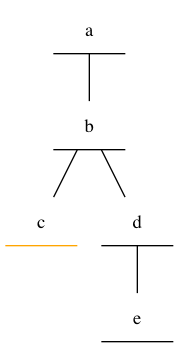

In [134]:
layout = 'dot'

G.node_attr['shape']='underline'

actual_node = G.get_node('c')

actual_node.attr['color']='orange'
# actual_node.attr['shape']='underline'
name = 'simple_'+layout+'.png'
G.draw(name, prog = layout)
display(Image('simple_dot.png'))

In [135]:
def display_graph(layout= 'dot', fformat = 'png'):
    if fformat not in ['png','svg']:
        print 'format is not real',fformat
        return
    name = 'simple_'+layout+'.'+fformat
    G.draw(name, prog = layout)
    if fformat == 'svg':
        display(SVG(name))
    else:
        display(Image(name))       

In [217]:
class ConversationTree:

    def __init__(self, root_sentence):
        self.G = pgv.AGraph()
        #
        self.G.node_attr['shape']='box'
        
        self.next_node_id = 0
        self.actual_node = None
        self.root = ConversationNode(self, self.G, None, self.next_id(), root_sentence)
        self.actual_node = self.root
             
    def add_node(self, sentence, goto = True):
        node = ConversationNode(self, self.G, self.actual_node, self.next_id(), sentence)
        if goto:
            self.change_actual(node)
    
    def change_actual(self, new):
        self.actual_node.unstyle()
        self.actual_node = new
        self.actual_node.style_actual()        
    
    def next_id(self):
        id_ = self.next_node_id 
        self.next_node_id += 1
        return id_
        
    def display(self, layout= 'dot', fformat = 'png'):
        if fformat not in ['png','svg']:
            print 'format is not real',fformat
            return
        name = 'simple_'+layout+'.'+fformat
        self.G.draw(name, prog = layout)
        if fformat == 'svg':
            display(SVG(name))
        else:
            display(Image(name))           
    
    
    def up(self):
        if actual_node.parent:
            change_actual
            
    
class ConversationNode:
    
    def __init__(self, conv_tree, graph, parent, id_, label):
        self.conv_tree = conv_tree
        self.graph = graph
        self.id_ = id_
        self.label = label
        graph.add_node(id_)
        self.g_node = graph.get_node(id_)
        self.g_node.attr['label'] = self.label
        self.child_edges = {}
        if parent:
            parent.add_child(self)
        else:
            self.parent_edge = None
        
    def add_child(self, node):
        edge_id = (self.id_, node.id_)
        self.graph.add_edge(edge_id)
        edge = self.graph.get_edge(*edge_id)
        self.child_edges[edge_id] = edge
        node.parent_edge = edge
        print edge

    def __repr__(self):
        return self.name

    def style(self, style_dict):
        for k,v in style_dict.iteritems():
            self.g_node.attr[k] = v
    
    def style_actual(self):
        self.style({'color': "orange"}) 
        
    def unstyle(self):
        self.style({'color': "black"}) 
    
#     def update_graph(self):
#         self.g_node.attr['label'] = node.label

class ConversationEdge:
        
    def __init__(self,from_to, prob = None):
        self.from_to = from_to
        self.prob = prob
        #
        self.prob = random.random()
        self.g_edge = None
        
    def update_graph(self):
        if not self.g_edge:
            self.g_edge = Edge.graph.get_edge(*self.from_to)
        self.g_edge.attr['label'] = round(self.prob,3)
        

(u'0', u'1')
(u'1', u'2')
(u'2', u'3')


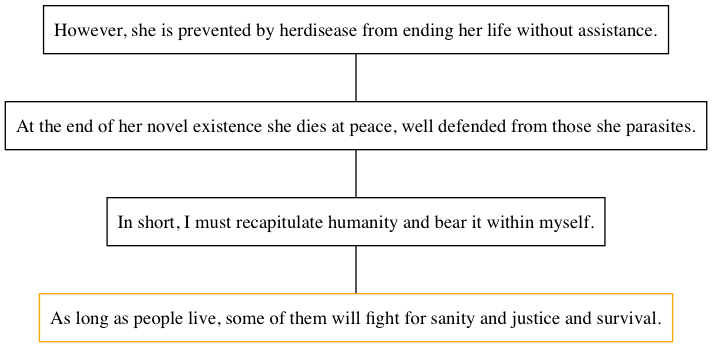

strict graph "" {
	node [label="\N",
		shape=box
	];
	0	 [color=black,
		label="However, she is prevented by herdisease from ending her life without assistance."];
	1	 [color=black,
		label="At the end of her novel existence she dies at peace, well defended from those she parasites."];
	0 -- 1;
	2	 [color=black,
		label="In short, I must recapitulate humanity and bear it within myself."];
	1 -- 2;
	3	 [color=orange,
		label="As long as people live, some of them will fight for sanity and justice and survival."];
	2 -- 3;
}



In [218]:
tree = ConversationTree(sentences['a'])
tree.add_node(sentences['b'])
tree.add_node(sentences['c'])
tree.add_node(sentences['d'])
tree.display()
print tree.G

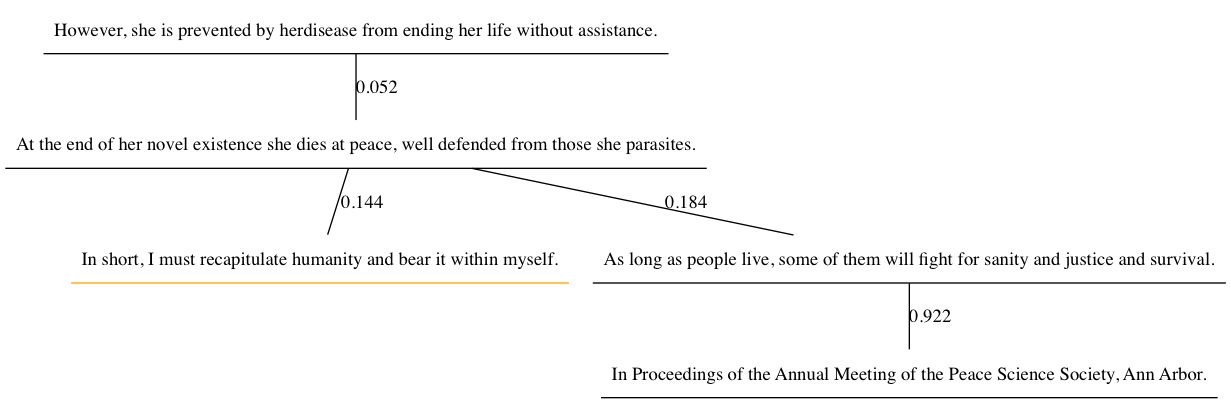

In [137]:


# nide styles: box, underline
G.node_attr['shape']='underline'

sentences = {
  'a': 'However, she is prevented by herdisease from ending her life without assistance.',
  'b': 'At the end of her novel existence she dies at peace, well defended from those she parasites.',
  'c': 'In short, I must recapitulate humanity and bear it within myself.',
  'd': 'As long as people live, some of them will fight for sanity and justice and survival.',
  'e': 'In Proceedings of the Annual Meeting of the Peace Science Society, Ann Arbor.'
}

# convert the initial nodes(just strings into my node class)
# contains the text, which will be used as label
nnodes = [Node(node,sentences[node])for node in nodes]
G.add_nodes_from(nnodes)
for node in nnodes:
    node.update_graph()


eedges = [Edge(edge)for edge in edges]
G.add_edges_from(edges)
for edge in eedges:
    edge.update_graph()
    
actual_node = G.get_node('c')
actual_node.attr['color']='orange'

display_graph(fformat='png')